Linear Regression from scratch

In [18]:
#data generated
import numpy as np
import matplotlib.pyplot as plt

x=[]
y=[]
for i in range(1000):
  x.append(i)
print(len(x))

for i in x:
  noise=np.random.randint(-1000,100)
  data=2*i+noise
  y.append(data)
print(len(y))

1000
1000


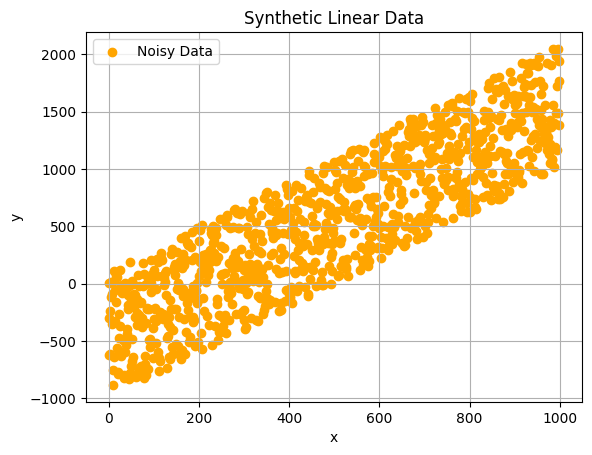

In [11]:
# plt.figure(figsize=(8,5))
plt.scatter(x, y, label="Noisy Data", color='orange')
# plt.plot(x, y_perfect, label="True Line (No Noise)", color='blue')
plt.title("Synthetic Linear Data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


In [12]:
#Loss Function
w,b=0,0
loss=[]
for i in range(len(x)):
  data=y[i]
  y_cap=data*w+b
  loss.append((data-y_cap)**2)
final_loss=sum(loss)/len(loss)
print(final_loss)

733597.346


In [13]:
print(max(x),max(y))

999 2047


In [14]:
# Step 1: Normalize the data
x_max = max(x)
y_max = max(y)
x_norm = [xi / x_max for xi in x]
y_norm = [yi / y_max for yi in y]
losses=[]
# Step 2: Initialize weights
w, c = 0, 0
lr = 0.01
epochs = 10000

# Step 3: Gradient Descent Training
for epoch in range(epochs):
    data_w = 0
    data_c = 0

    for j in range(len(x_norm)):
        y_cap = w * x_norm[j] + c
        error = y_norm[j] - y_cap
        data_w += x_norm[j] * error
        data_c += error

    grad_w = -(2 / len(x_norm)) * data_w
    grad_c = -(2 / len(x_norm)) * data_c

    w = w - lr * grad_w
    c = c - lr * grad_c

    # Monitor training progress
    if epoch % 100 == 0:
        loss = sum([(y_norm[j] - (w * x_norm[j] + c)) ** 2 for j in range(len(x_norm))]) / len(x_norm)
        losses.append(loss)
        print(f"Epoch {epoch}: Loss={loss:.6f}, w={w:.4f}, c={c:.4f}")

# Step 4: Denormalize learned parameters
# Final model: y = w_real * x + c_real
w_real = w * (y_max / x_max)
c_real = c * y_max

print(f"\nFinal learned parameters (original scale): w = {w_real:.4f}, c = {c_real:.4f}")


Epoch 0: Loss=0.170287, w=0.0043, c=0.0055
Epoch 100: Loss=0.069448, w=0.2212, c=0.1652
Epoch 200: Loss=0.058623, w=0.3195, c=0.1337
Epoch 300: Loss=0.050698, w=0.3986, c=0.0930
Epoch 400: Loss=0.044613, w=0.4674, c=0.0563
Epoch 500: Loss=0.039938, w=0.5277, c=0.0241
Epoch 600: Loss=0.036346, w=0.5805, c=-0.0042
Epoch 700: Loss=0.033587, w=0.6268, c=-0.0290
Epoch 800: Loss=0.031467, w=0.6673, c=-0.0507
Epoch 900: Loss=0.029839, w=0.7029, c=-0.0697
Epoch 1000: Loss=0.028588, w=0.7341, c=-0.0864
Epoch 1100: Loss=0.027627, w=0.7614, c=-0.1010
Epoch 1200: Loss=0.026888, w=0.7853, c=-0.1139
Epoch 1300: Loss=0.026321, w=0.8063, c=-0.1251
Epoch 1400: Loss=0.025885, w=0.8247, c=-0.1349
Epoch 1500: Loss=0.025550, w=0.8409, c=-0.1436
Epoch 1600: Loss=0.025293, w=0.8550, c=-0.1511
Epoch 1700: Loss=0.025096, w=0.8674, c=-0.1578
Epoch 1800: Loss=0.024944, w=0.8782, c=-0.1636
Epoch 1900: Loss=0.024827, w=0.8878, c=-0.1687
Epoch 2000: Loss=0.024738, w=0.8961, c=-0.1731
Epoch 2100: Loss=0.024669, w=0.

1.9574282044808076
Final Mean Squared Error: 99023.90


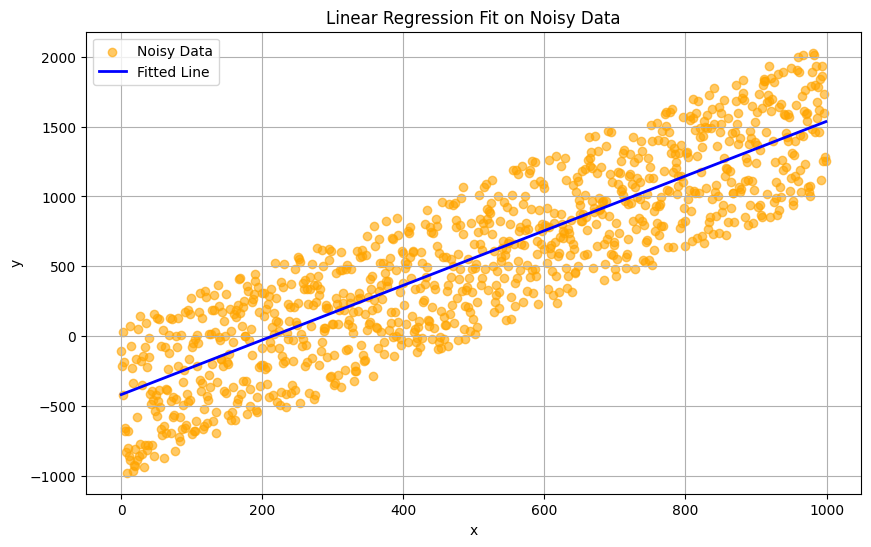

In [20]:
# --- Final Evaluation ---
# Compute Final MSE on original scale
final_predictions = [w_real * xi + c_real for xi in x]
final_loss = sum([(y[i] - final_predictions[i]) ** 2 for i in range(len(y))]) / len(y)
print(f"Final Mean Squared Error: {final_loss:.2f}")

# --- Visualization: Data and Fitted Line ---
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label="Noisy Data", color='orange', alpha=0.6)
plt.plot(x, final_predictions, label="Fitted Line", color='blue', linewidth=2)
plt.title("Linear Regression Fit on Noisy Data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


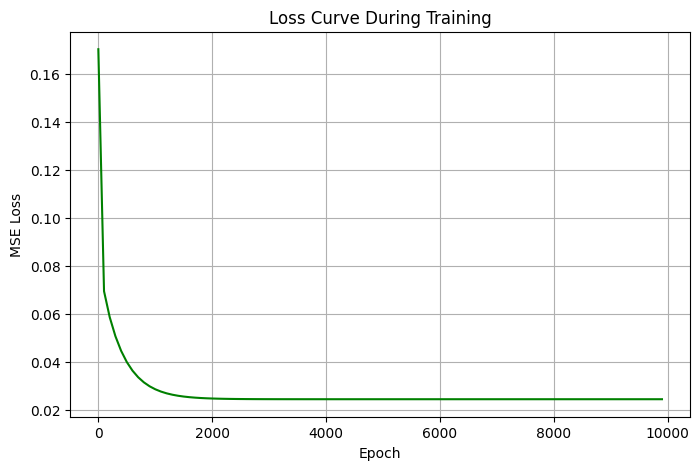

In [17]:
# Loss Curve (Optional)
plt.figure(figsize=(8, 5))
plt.plot(range(0, epochs, 100), losses, color='green')
plt.title("Loss Curve During Training")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()


In [19]:
# Sckit learn Implementation

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

data={
    'X':x,
    'Y':y
}

df = pd.DataFrame(data)

X = df[['X']]
y = df['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))


Coefficients: [2.03036304]
Intercept: -471.5518933132489
Mean Squared Error: 91900.16502255428
R^2 Score: 0.7812696027025505
